## COMP5625M Formative Practical Assessment - Deep Learning [50 marks]


<div class="logos"><img src="Comp5625M_logo.jpg" width="220px" align="right"></div>

This is a **formative assessment** designed to help you understand how your assessment will be marked and the feedback will be provided. **These are sample practical questions and does not carry any weight to the final module grading.**
> 1. Understanding and implementing basic elements of neural networks (e.g., loss functions) [20 Marks]
> 2. Image classification using a Multi-layer Perceptron (MLP, a type of deep neural network) [30 Marks]

The maximum number of marks for each part is shown in the section headers. As indicated in the main heading above, the overall assessment carries a maximum of 50 marks.

**This is a formative assessment so the scored marks do not carry any weight to the final module marks.**


### Motivation 

Through this fomative assessment, you will:

> 1. Implement and understand/design various essential ingredients of a neural network
> 2. Understand and implement your first deep neural network (DNN) 
> 3. Learn to train a shallow DNN model designed in (2) for image classification of natural scene data  
> 4. Use various metrics to understand how your network is performing 


### Setup and resources 

You must work using this provided template notebook.

Having a GPU will speed up the training process. See the provided document on Minerva about setting up a working environment for various ways to access a GPU.

Please implement the coursework using **Python and PyTorch**, and refer to the notebooks and exercises provided.


### Submission

Please submit the following:

> 1. Your completed Jupyter notebook file, without removing anything in the template, in **.ipynb format.**
> 2. The **.html version** of your notebook; File > Download as > HTML (.html). Check that all cells have been run and all outputs (including all graphs you would like to be marked) displayed in the .html for marking.
> 3. Submit it through **Minerva Gradebook Submission** 

**Final note:**

> **Please display everything that you would like to be marked. Under each section, put the relevant code containing your solution. You may re-use functions you defined previously, but any new code must be in the relevant section.** Feel free to add as many code cells as you need under each section.


Your student username (for example, ```sc15jb```): 

--> tdmr0553

Your full name: 

-->Peng Daiyun

### Part I: Ingredients of a neural network [20 marks]

What will you learn here?

**Mathematical expression of the algorithm**:

For one example $\bf{x}^{(i)}$:
$$\bf{z}^{(i)} = \bf{w}^T \bf{x}^{(i)} + b $$

$$\hat{\bf{y}}^{(i)} = \bf{a}^{(i)} = sigmoid(\bf{z}^{(i)}) = \frac{1}{1+e^{-\bf{z}^{(i)}}}$$


**Loss or error function:** 

$\mathcal{L}(\bf{a}^{(i)}, \bf{y}^{(i)}) =  - \bf{y}^{(i)}  \log(\bf{a}^{(i)}) - (1-\bf{y}^{(i)} )  \log(1-\bf{a}^{(i)})$

If $ y =1: \mathcal{L}(\hat{y}, y) = -log(\hat{y})$ i.e. we want to make $\hat{y}$ large

If $ y =0: \mathcal{L}(\hat{y}, y) = -log(1-\hat{y})$ i.e. we want to make $\hat{y}$ as small as possible

**Cost function:**
The cost is then computed by summing over all $m$ training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(\bf{a}^{(i)}, \bf{y}^{(i)})$$


#### Build the ingredients

[1] Activation functions (5 Marks)

[2] Forward pass *(includes weights, activation functions)* (5 Marks)

[3] Understand and implement cost function (5 Marks)

[4] Understand and implement backward pass and update of weights (5 Marks)


### Required packages
[1] [numpy](http://www.numpy.org) is package for scientific computing with python

[2] [h5py](http://www.h5py.org) is package to interact with compactly stored dataset

[3] [matplotlib](http://matplotlib.org) can be used for plotting graphs in python


In [1]:
import numpy as np
import h5py 
import matplotlib.pyplot as plt

**[1] Implement Activation functions** (5 Marks)

In [2]:
# Implement a sigmoid function

def sigmoid(z):
#                          #---> your code here 
     s = 1/(1+np.exp(-z))
     return s



In [3]:
# print values for -0.1 and 0.5: e.g.,  print ("sigmoid(-0.1) = " + str(sigmoid(-0.1)))

print ("sigmoid(-0.1) = " + str(sigmoid(-0.1)))
print ("sigmoid(0.5) = " + str(sigmoid(0.5)))

sigmoid(-0.1) = 0.47502081252106
sigmoid(0.5) = 0.6224593312018546


In [4]:
# Implement a ReLu Activation function and find values for -0.1 and 0.5

def relu(z):
    r = np.maximum(0, z)
    return r

z1 = np.array([-0.1,0.5])

print(" The values for -0.1 and 0.5 of ReLu Activation function is ", relu(z1))


 The values for -0.1 and 0.5 of ReLu Activation function is  [0.  0.5]


Consider a neural network with X input and W as weight matrix and b as bias. Then the forward prpagation can be given as below:

**Forward propagation:**

- You get X (vectorize your data, in python data.flatten(),  $w\times h \times ch$)
- $\bf{z} = W^{T} X + b$
- You can compute sigmoid activation function A as: $A = \sigma(\bf{z}) = (a^{(0)}, a^{(1)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function (calculated over all input values) => $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

In [5]:
def vectorize_data(X):
    v = X.flatten()
    return v

def sigmoid(z):
    
    s = 1/(1+np.exp(-z))

    return s


In [6]:
def forward_pass(w, b, X):
    """
    Implement the cost function for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)

    Return:
    Z -- weighted sum
    A -- activation function output
"""
    
    # Step 1: Forward propagation

    Z = np.dot(w.T, X) + b
    # compute activation
    A = sigmoid(Z) 

    return Z, A

#### Exercise 
The figure below represents a two layer neural network with the expected label outputs from each output layer. Input values, associated weights in each layer and bias is given. Here, we have used sigmoid activation function.



<div class="figure"><img src="Formative_Assessment_figure1.jpg" width="840px" align="center"></div>

**Find the forward pass for the (first) hidden layer in the figure above**

In [7]:

X = np.array([0.1, 0.5])
b = [0.25, 0.25]
W = np.array([[0.1, 0.2], [0.3, 0.4]])

Z, A = forward_pass(W, b, X)

print(Z)
print(A)


[0.41 0.47]
[0.60108788 0.61538376]


**Find the values from the output layer in the figure above** (5 marks)

In [8]:
# your code here:
X_O = np.array([0.60108788, 0.61538376])
b_O = [0.35, 0.35]
W_O = np.array([[0.5, 0.6], [0.7, 0.8]])

Z_O, A_O = forward_pass(W_O, b_O, X_O)

print(Z_O)
print(A_O)

[1.08131257 1.20295974]
[0.7467423  0.76905089]


**Cost function**
Cost is a scalar value $J$ that can be computed using a metric that compares the true/expected value with the predicted output from the output layer. The values are summed for entire/batch of training samples. These cost can then be used for backpropagation.

In [9]:
def cost(Y_out, Y_true):
    """
    Implement the cost function for the propagation explained above

    Arguments:
    Y_out -- output from the last (output) layer 
    Y_true -- true "label" vector (e.g., containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost/J -- negative log-likelihood cost for logistic regression
"""
    m = Y_out.shape[0]

    # remember: your activation is the output here but only if you have one neuron other wise it is activation at A^[L-1]    
    # compute cost J (we are not using mean square error as this is non-convex in binary classification,
    # so, we use logistic regression log likelihoods)
    cost = (- 1 / m) * np.sum(Y_true * np.log(Y_out) + (1 - Y_true) * (np.log(1 - Y_out)))  
    
    return cost

**Find the cost of the network at the first iteration (forward pass) in the figure above** (5 marks)

In [10]:
# # your code here: 
Y_true = np.array([0, 1])
Y_out = A_O
J_cost = cost(Y_out, Y_true)

print("the cost of the network at the first iteration (forward pass) =", J_cost)

the cost of the network at the first iteration (forward pass) = 0.8179729262604242


**Backward pass**
A loss function is calculated from the output values as indicated above. Then the "backward pass" refers to process of changing the weights (with a certain learning rate) by computing gradients. For this algortihms such as gradient descent algorithm (or similar) can be used.

In [11]:
def backward_pass(W, A, Y_true, cost):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    A -- Activation outputs that forms the input to the neurons (input X if the first hidden layer)
    Y -- true "label" vector (e.g., containing 0 if non-cat, 1 if cat) of size (1, number of examples)
    cost/J -- negative log-likelihood cost or mean squared error

    Return:
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    
    m = A.shape[0]
  
    # Step 2: Backward propagation (compute your derivatives of the computed cost see derivation above (slope))
    dw = (1 / m) * np.dot(X, (A - Y_true).T)
    db = (1 / m) * np.sum(A - Y_true)

    assert(db.dtype == float)
    
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
#     return gradients and cost 
    
    return grads

**Find the backward pass and update the output layer weights** 

In [12]:
Y_true = np.array([0, 1]) 
Y_out = A_O           #--->this should be output activation 
W_O = np.array([[0.5, 0.6], [0.7, 0.8]])
b_O = np.array([0.35, 0.35])

cost_val = cost(Y_out, Y_true)
grad_O = backward_pass(W_O, Y_out, Y_true, cost_val)

print(grad_O)

# update your weights linked to output layer parameters (i.e. new set of w and b are found)
learning_rate = 0.1
dw = grad_O["dw"]
db = grad_O["db"]
W_O = W_O - learning_rate * dw  
b_O = b_O - learning_rate * db

print(W_O)

{'dw': -0.020400163856344522, 'db': 0.2578965902986269}
[[0.50204002 0.60204002]
 [0.70204002 0.80204002]]


**Find the backward pass and update the hidden layer weights** (5 marks)

In [13]:

Y_true = np.array([0,1])
_, A_O = forward_pass(W_O,b_O,X_O)
Y_out = A_O    

cost_val_H = cost(Y_out, Y_true)
grad_H = backward_pass(W_O, X_O, Y_true, cost_val_H)

print(grad_H)

learning_rate = 0.1
dw = grad_H["dw"]
db = grad_H["db"]
W_H = W_O - learning_rate * dw  
b_H = b_O - learning_rate * db

print(W_H)
print(b_H)

{'dw': -0.06609966600000002, 'db': 0.10823581999999998}
[[0.50864998 0.60864998]
 [0.70864998 0.80864998]]
[0.31338676 0.31338676]


### Part II: Image Classification using a Multi-layer Perceptron (type of Deep Neural Network) [30 marks]

#### Dataset
This coursework will use a subset of images from Tiny ImageNet, which is a subset of the [ImageNet dataset](https://www.image-net.org/update-mar-11-2021.php). Our subset of Tiny ImageNet contains **30 different categories**, we will refer to it as TinyImageNet30. The training set has 450 resized images (64x64 pixels) for each category (13,500 images in total). You can download the training and test set from the Kaggle website:

>[Direct access of data is possible by clicking here, please use your university email to access this](https://leeds365-my.sharepoint.com/:u:/g/personal/scssali_leeds_ac_uk/ESF87mN6kelIkjdISkaRow8BublW27jB-P8eWV6Rr4rxtw?e=SPASDB)

##### Required packages to complete this part

Please make sure that you have the following packages installed before you begin.

[1] [numpy](http://www.numpy.org) is package for scientific computing with python

[2] [h5py](http://www.h5py.org) is package to interact with compactly stored dataset

[3] [matplotlib](http://matplotlib.org) can be used for plotting graphs in python

[4] [pytorch](https://pytorch.org/docs/stable/index.html) is library widely used for bulding deep-learning frameworks

Feel free to add to this section as needed some examples for importing some libraries is provided for you below.

You may need to install these packages using [pip](https://pypi.org/project/opencv-python/) or [conda](https://anaconda.org/conda-forge/opencv).

In [14]:
import cv2
import math

import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.hub import load_state_dict_from_url

from PIL import Image
import matplotlib.pyplot as plt

In [15]:
# always check your version
print(torch.__version__)

2.5.1+cu121


One challenge of building a deep learning model is to choose an architecture that can learn the features in the dataset without being unnecessarily complex. The first part of the coursework involves building a MLP (type of DNN) and training it on TinyImageNet30. 

#### **Overview of image classification:**

**1. Function implementation** [10 marks]

*   **1.1** PyTorch ```Dataset``` and ```DataLoader``` classes (4 marks)
*   **1.2** PyTorch ```Model``` for a simple MLP model (6 marks)

**2. Model training and evaluation** [20 marks]
*   **2.1** Training on TinyImageNet30 dataset (10 marks)
*   **2.2** Generating confusion matrices and ROC curves (10 marks)

### 1 Function implementations [10 marks]


#### 1.1 Dataset class (4 marks)

Write a PyTorch ```Dataset``` class (an example [here](https://www.askpython.com/python-modules/pytorch-custom-datasets) for reference) which loads the TinyImage30 dataset and ```DataLoaders``` for training and validation sets.

In [7]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms


class TinyImage30Dataset(Dataset):
      def __init__(self, root_dir, transform=None):
    
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []
        
        # make sure root_dir is valid
        if not os.path.isdir(root_dir):
            raise FileNotFoundError(f"Dataset directory '{root_dir}' not found!")

        # get subset
        self.classes = sorted(
            [d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))]
        )
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.classes)}

        for cls in self.classes:
            class_dir = os.path.join(root_dir, cls)
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
             
                if os.path.isfile(img_path) and img_name.lower().endswith((".png", ".jpg", ".jpeg")):
                    self.image_paths.append(img_path)
                    self.labels.append(self.class_to_idx[cls])
    
      def __len__(self):
            return len(self.image_paths)
    
      def __getitem__(self, idx):
            img_path = self.image_paths[idx]
            image = Image.open(img_path).convert("RGB")
            label = self.labels[idx]
            
            if self.transform:
                image = self.transform(image)
            
            return image, label
        
data_transforms = transforms.Compose([
        transforms.RandomResizedCrop(64),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
  
train_dir = "./Dataset/train_set/train_set"

train_dataset = TinyImage30Dataset(root_dir= train_dir, transform =data_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

train_sample_images, train_sample_labels = next(iter(train_loader))

print(f"Train batch image shape: {train_sample_images.shape}")
print(f"Train batch labels: {train_sample_labels}")

Train batch image shape: torch.Size([32, 3, 64, 64])
Train batch labels: tensor([22,  6, 14, 10, 17, 17,  9, 28, 12, 10,  8, 26,  4,  9,  2, 18, 25, 17,
        12,  0,  7,  4, 19, 22,  5, 13,  2,  1, 11,  0,  8, 16])


### 1.2 Define a MLP model class (6 marks)

<u>Create a new model using a combination of:</u>
- Input Units
- Hidden Units
- Output Units
- Activation functions
- Loss function
- Optimiser

In [6]:
# define a MLP Model

import torch
import torch.nn as nn
import torch.optim as optim

class MLP(nn.Module):
    def __init__(self, input_units, hidden_units, output_units):
     
        super(MLP, self).__init__()
      
        self.fc1 = nn.Linear(input_units, hidden_units) 
        self.fc2 = nn.Linear(hidden_units, output_units) # Output layer

        self.relu = nn.ReLU() 
        self.softmax = nn.Softmax(dim=1)  

    def forward(self, x):
       
        x = self.fc1(x)  # Input to first hidden layer
        x = self.relu(x)  

        x = self.fc2(x)  # Output layer
        return self.softmax(x)  


### 2 Model training [20 marks]


#### 2.1 Train your MLP model - show loss and accuracy graphs side by side (10 marks)

Train your model on the TinyImageNet30 dataset. Split the data into train and validation sets to determine when to stop training. Use seed at 0 for reproducibility and test_ratio=0.2 (validation data)

Display the graph of training and validation loss over epochs and accuracy over epochs to show how you determined the optimal number of training epochs. A top-*k* accuracy implementation is provided for you below.

> Please leave the graph clearly displayed. Please use the same graph to plot graphs for both train and validation.


In [8]:
# (HelperDL function) -- Define top-*k* accuracy (**new**)
def topk_accuracy(output, target, topk=(1,)):
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    batch_size = target.size(0)
    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res

In [11]:
#TO COMPLETE --> Running your MLP model class
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, SubsetRandomSampler
import matplotlib.pyplot as plt

# Assuming TinyImage30Dataset and MLP classes are already defined as provided.

def split_dataset(dataset, test_ratio=0.2, seed=0):
    indices = list(range(len(dataset)))
    train_indices, val_indices = train_test_split(indices, test_size=test_ratio, random_state=seed)
    return train_indices, val_indices

def topk_accuracy(output, target, topk=(1,)):
  
    maxk = max(topk)
    batch_size = target.size(0)

    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].reshape(-1).float().sum(0, keepdim=True)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res

# Dataset and DataLoader for training and validation sets
train_dir = "./Dataset/train_set/train_set"
data_transforms = transforms.Compose([
    transforms.RandomResizedCrop(64),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
dataset = TinyImage30Dataset(root_dir=train_dir, transform=data_transforms)

# Set seed for reproducibility
torch.manual_seed(0)

# Split dataset
train_indices, val_indices = split_dataset(dataset)

# Create DataLoaders for train and validation
train_loader = DataLoader(dataset, batch_size=32, sampler=SubsetRandomSampler(train_indices))
val_loader = DataLoader(dataset, batch_size=32, sampler=SubsetRandomSampler(val_indices))

# Initialize model, loss function, optimizer
model = MLP(input_units=64*64*3, hidden_units=128, output_units=len(dataset.classes))  # Adjust input units based on your image size
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store loss and accuracy for each epoch
train_losses = []
train_accuracies = []
val_accuracies = []

# Training loop
num_epochs = 25
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        # Flatten images for MLP
        inputs = inputs.view(inputs.size(0), -1)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
        # Calculate training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(100 * correct / total)
    
    # Validation loop
    model.eval()
    with torch.no_grad():
        top1_correct = 0
        total = 0
        for inputs, labels in val_loader:
            inputs = inputs.view(inputs.size(0), -1)
            outputs = model(inputs)
            topk_acc = topk_accuracy(outputs, labels, topk=(1,))
            
            top1_correct += topk_acc[0].item() * inputs.size(0) / 100
            total += inputs.size(0)
        
        val_accuracies.append(top1_correct / total * 100)
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}, Train Accuracy: {100 * correct / total:.2f}%, Val Accuracy: {top1_correct / total * 100:.2f}%")



Epoch 1/25, Loss: 3.3842, Train Accuracy: 27.85%, Val Accuracy: 6.89%
Epoch 2/25, Loss: 3.3834, Train Accuracy: 29.04%, Val Accuracy: 7.22%
Epoch 3/25, Loss: 3.3829, Train Accuracy: 29.41%, Val Accuracy: 6.37%
Epoch 4/25, Loss: 3.3866, Train Accuracy: 27.93%, Val Accuracy: 6.59%
Epoch 5/25, Loss: 3.3842, Train Accuracy: 28.85%, Val Accuracy: 7.00%
Epoch 6/25, Loss: 3.3820, Train Accuracy: 29.81%, Val Accuracy: 6.59%
Epoch 7/25, Loss: 3.3867, Train Accuracy: 28.07%, Val Accuracy: 7.30%
Epoch 8/25, Loss: 3.3859, Train Accuracy: 28.30%, Val Accuracy: 6.70%
Epoch 9/25, Loss: 3.3871, Train Accuracy: 27.67%, Val Accuracy: 6.85%
Epoch 10/25, Loss: 3.3904, Train Accuracy: 26.63%, Val Accuracy: 6.89%
Epoch 11/25, Loss: 3.3860, Train Accuracy: 28.37%, Val Accuracy: 7.22%
Epoch 12/25, Loss: 3.3874, Train Accuracy: 27.70%, Val Accuracy: 6.15%
Epoch 13/25, Loss: 3.3897, Train Accuracy: 26.78%, Val Accuracy: 6.26%
Epoch 14/25, Loss: 3.3909, Train Accuracy: 26.26%, Val Accuracy: 6.37%
Epoch 15/25, Lo

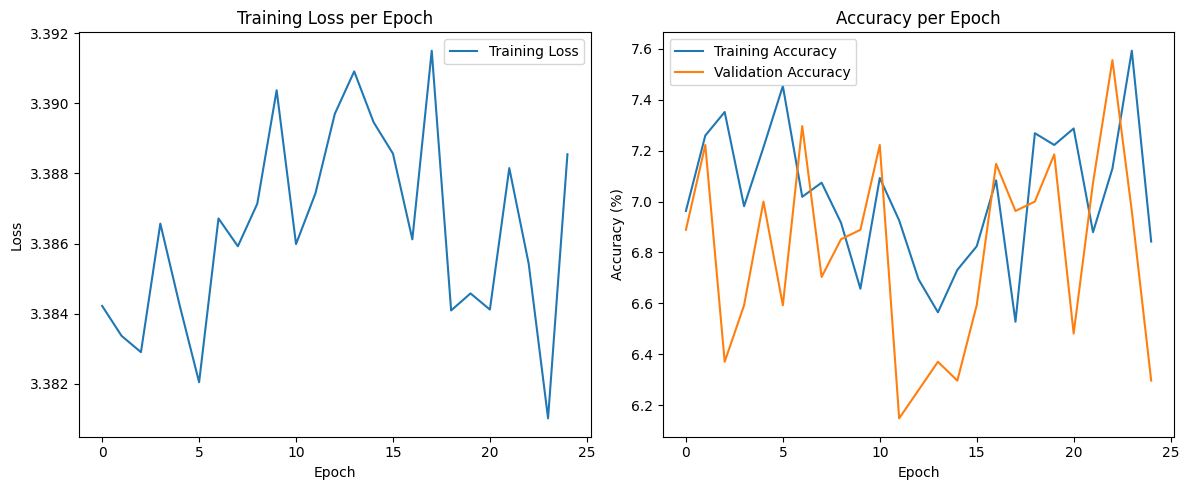

In [12]:
# Your graph

# Plotting the results
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()





> Comment on your model and the results you have obtained. This should include the number of parameters for your model.

### 2.2 Generating confusion matrix and ROC curves (10 marks)
- Use your MLP architecture to generate two confusion matrices, one for the training set and another for the validation set. Remember to use the whole validation and training sets, and to include all your relevant code. Display the confusion matrices in a meaningful way which clearly indicates what percentage of the data is represented in each position.
- Display an ROC curve for the two top and two bottom classes with area under the curve

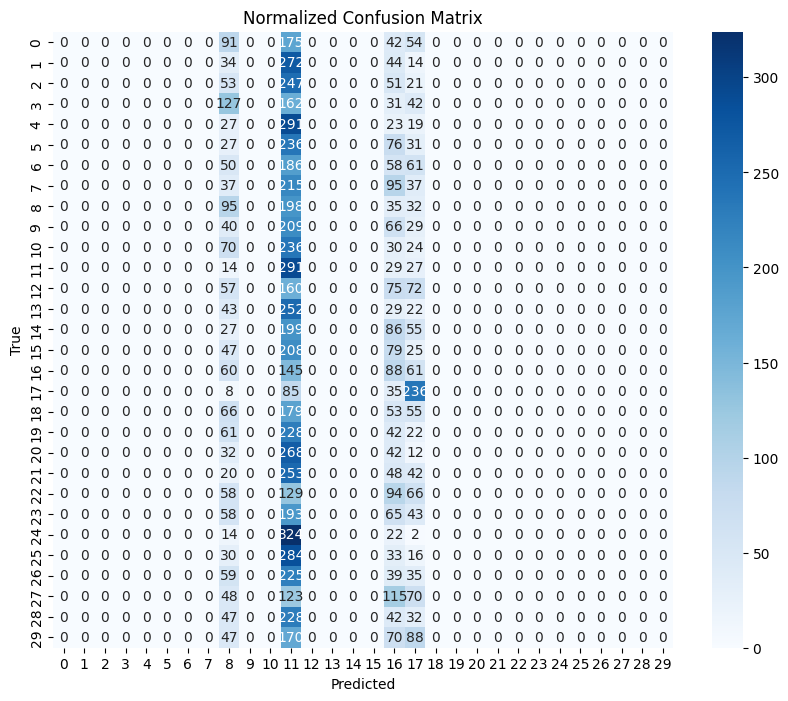

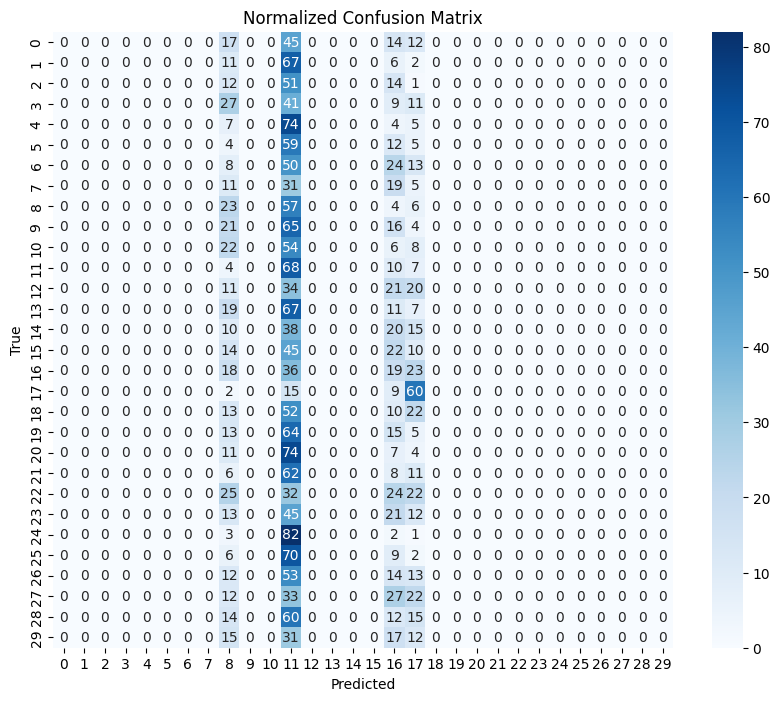

In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
import torch
from torchvision import transforms

def generate_confusion_matrix(model, dataloader, classes):
    all_preds = []
    all_labels = []
    model.eval()
    
    with torch.no_grad():
        for inputs, labels in dataloader:
            # Flatten images for MLP
            inputs = inputs.view(inputs.size(0), -1)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    cm = confusion_matrix(all_labels, all_preds)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(30), yticklabels=range(30))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Normalized Confusion Matrix')
    plt.show()

generate_confusion_matrix(model, train_loader, "Train")
generate_confusion_matrix(model, val_loader, "Validation")



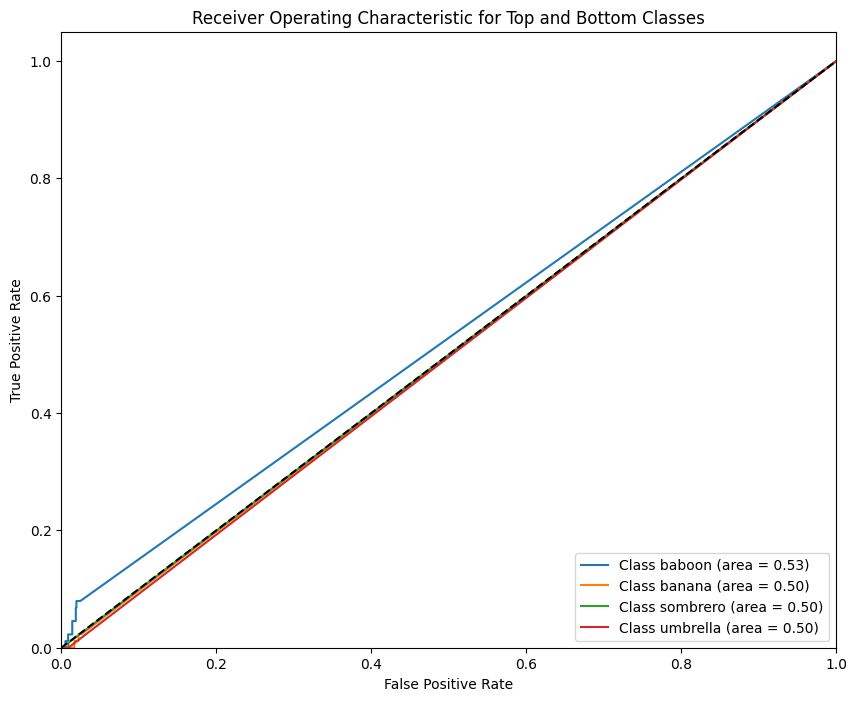

In [29]:
from sklearn.preprocessing import label_binarize

def compute_roc_curve(model, dataloader, classes, top_classes, bottom_classes):
    all_outputs = []
    all_labels = []
    model.eval()
    
    with torch.no_grad():
        for inputs, labels in dataloader:
            # Flatten images for MLP
            inputs = inputs.view(inputs.size(0), -1)
            outputs = model(inputs)
            all_outputs.append(outputs.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    all_outputs = np.concatenate(all_outputs)
    all_labels = label_binarize(all_labels, classes=range(len(classes)))
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    # Plot ROC curve for top and bottom classes
    plt.figure(figsize=(10, 8))
    for i in top_classes + bottom_classes:
        fpr[i], tpr[i], _ = roc_curve(all_labels[:, i], all_outputs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
        plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (area = {roc_auc[i]:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for Top and Bottom Classes')
    plt.legend(loc="lower right")
    plt.show()

top_2_classes = [0, 1]  
bottom_2_classes = [28, 29]  

compute_roc_curve(model, val_loader, dataset.classes, top_2_classes, bottom_2_classes)

##### Thank you for completing the assessment - if you have any question, please ask on teams channel or attend lab sessions **(Room 2.05, Bragg) on  Wednesdays (13:00 - 15:00 hrs) and Thursdays (15:00 - 17:00 hrs)**.